# Sécurisation des communications

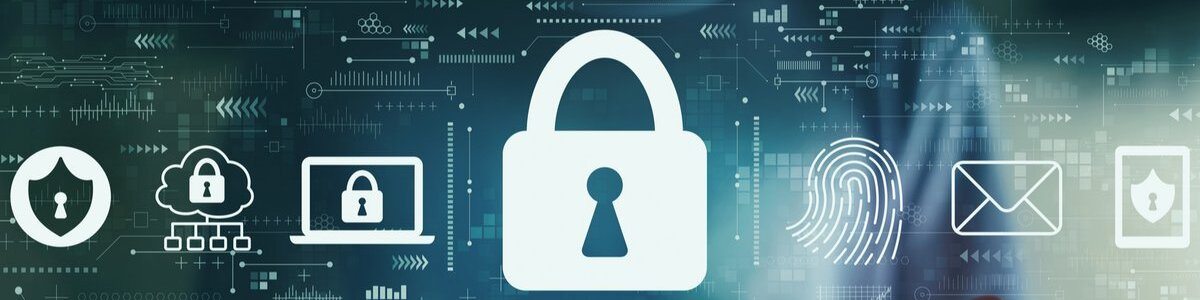


---
## Chiffrement symétrique

### Le décalage

**Principe :**  
Une manière très simple de chiffrer un message est la méthode du décalage, cette méthode est parfois appelé **Avocat** (pour "A vaut K", ainsi "B" vaudra "L" etc… : décalage de 10) ou encore **Code de César** car l'empereur romain utilisait cette méthode pour communiquer de manière cryptée avec ses généraux.

>_« Il y employait, pour les choses tout à fait secrètes, une espèce de chiffre qui en rendait le sens inintelligible (les lettres étant disposées de manière à ne pouvoir jamais former un mot), et qui consistait, je le dis pour ceux qui voudront les déchiffrer, à changer le rang des lettres dans l'alphabet, en écrivant la quatrième pour la première, c'est-à-dire le D pour le A, et ainsi de suite. »_  
>___Suétone, Vie des douze Césars, Livre I, paragraphe 56.___  

Le texte chiffré s'obtient en remplaçant chaque lettre du texte clair original par une lettre à distance fixe, toujours du même côté, dans l'ordre de l'alphabet. Autrement dit, on décale toutes les lettres d'un nombre convenu à l'avance.  
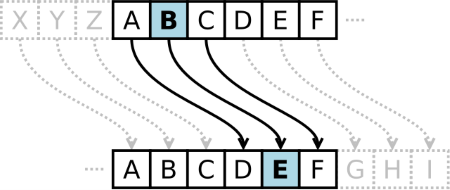
<center><i>Exemple ici avec un décalage de 3</i></center>  
  
**Exemple :**  
La phrase `VIVE LA NSI` encodée avec un décalage de 8 donnera `DQDM TI VAQ`  

**Robustesse :**  
Cette méthode est très simple à comprendre et mettre en oeuvre, cependant pour déchiffrer un message il suffit de tester les 26 décalages possibles. Une méthode par **force brute** peut venir assez facilement à bout de ce chiffrage.


---
### Le chiffrement par substitution
**Principe :**  
Cette manière dérivée du décalage consiste à substituer dans un message chacune des lettres de l'alphabet par une autre, cette fois-ci arbitrairement et non décalée. Elle nécessite de fournir un **Alphabet de substitution** autrement-dit, la lettre associée à chacune des lettres de l'alphabet d'origine.  
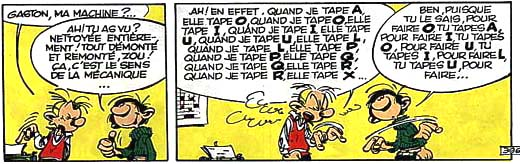
  
**Exemple :**  
Avec l'alphabet suivant :   

<table>
<td>Texte clair</td><td>A</td><td>B</td><td>C</td><td>D</td><td>E</td><td>F</td><td>G</td><td>H</td><td>I</td><td>J</td><td>K</td><td>L</td><td>M</td><td>N</td><td>O</td><td>P</td><td>Q</td><td>R</td><td>S</td><td>T</td><td>U</td><td>V</td><td>W</td><td>X</td><td>Y</td><td>Z</td></tr>
<tr>
<td>Texte codé</td>
<td>Z</td><td>Y</td><td>X</td><td>W</td><td>V</td><td>U</td><td>T</td><td>S</td><td>R</td><td>Q</td><td>P</td><td>O</td><td>N</td><td>M</td><td>L</td><td>K</td><td>J</td><td>I</td><td>H</td><td>G</td><td>F</td><td>E</td><td>D</td><td>C</td><td>B</td><td>A</td></tr>
</table>

La phrase `VIVE LA NSI` donnera `EREV OZ MHR`

**Robustesse :**  
Ici, le nombre de possibilités est de $26!$ (factorielle de 26 soit $26\times25 \times24 \times…\times1$) ce qui donne environ $4 \times 10^{26}$ possibilités ce qui pour l'instant est inviolable par force brute.  
Cependant, comme pour chaque lettre est systématiquement substituée par la même, il est possible de déchiffrer cette méthode en utilisant l'**analyse fréquentielle** qui consiste à analyser la fréquence des lettres dans un message et en déduire la lettre d'origine (en français la lettre "E" représente environ 15% des fréquences contre 9% pour le "A" et 0.2% pour le "Y") nous verrons plus de détails dans la vidéo plus bas ou vous pouvez lire l'article [suivant](https://fr.wikipedia.org/wiki/Analyse_fr%C3%A9quentielle) sur Wikipedia.
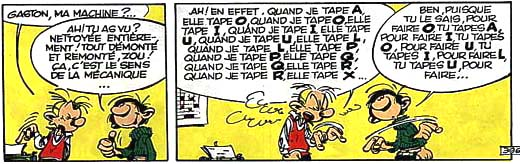

### Le masque jetable
**Principe, exemple :**  
- On choisit un mot, une phrase appelée **masque jetable** ou **clé de chiffrement** par exemple `toto`
- Nous allons ensuite considérer notre message à crypter en tant que donnée binaire (code ASCII ou unicode par exemple), ainsi le message `Hello World!` vaudra en ASCII:  
```
010010000110010101101100011011000110111100100000010101110110111101110010011011000110010000100001
```
- Enfin, nous allons utiliser la clé de chiffrement en binaire ( `01110100011011110111010001101111` pour `toto`) et effectuer un **ou exclusif** (ou XOR ou ⊕) bit à bit entre les deux.  
Comme la clé est plus courte que le message, il faut dupliquer la clé vers la droite autant de fois que nécessaire.
Ainsi : 
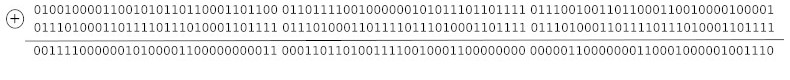
- On obtient donc la suite de bits suivante :  
```
001111000000101000011000000000110001101101001111001000110000000000000110000000110001000001001110
```
Soit la chaine de caractères : `<O#N`

- L’opérateur xor est réversible ce qui fait que la même clé utilisée sur le message crypté permettra d'obtenir le message d'origine :  
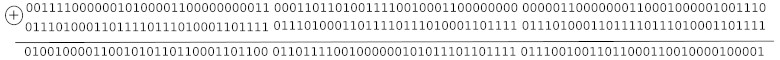
On retrouve bien le code binaire de `Hello World!`

**Robustesse :**  
Si le masque avec lequel on effectue le xor sur le message est aussi long que le message, alors il est impossible de retrouver le message initial.  
Imaginons qu'Alice veuille transmettre le message clair `LUNDI`. Elle le chiffre avec un masque jetable (que connait aussi Bob), et Bob reçoit donc `KHZOK`. Si Marc a intercepté le message `KHZOK`, même s'il sait que la méthode de chiffrement utilisée est celle du masque jetable, il n'a pas d'autre choix que de tester tous les masques de 5 lettres possibles. Ce qui lui donne plus de 11 millions de possibilités pour le masque, et par conséquent plus de 11 millions de possibilités pour le message déchiffré.
Cela signifie que Marc verra apparaître, dans sa tentative de déchiffrage, les mots `MARDI`, `JEUDI`, `JOUDI`, `STYLO`, `FSDJK`, `LUNDI`, `LUNDA`… Il n'a aucune possibilité de savoir où est le bon message original parmi toutes les propositions.
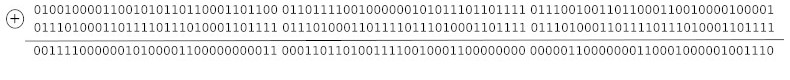
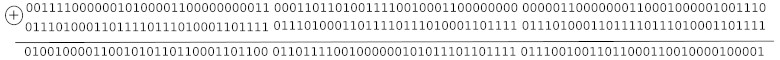

### Bilan chiffrement symétrique
> 📌 Un chiffrement est dit **symétrique** lorsque la clé ayant servi au chiffrement permet également de déchiffrer le message.  

La **clé de chiffrement** peut être :
- Un nombre (dans un simple décalage des lettres de l'alphabet, comme le chiffre de César)
- Une phrase (dans la méthode du masque jetable)
- Une image (imaginez un chiffrement où on effectue un XOR par les pixels d'une image)

**Avantages :**
- Facile à mettre en oeuvre et à utiliser
- Rapide et peu gourmand en ressources
- Avantageux pour le traitement et le transfert de grandes quantités de données

**Inconvénients :**
- La perte d’une clé signifie que les données chiffrées avec cette clé sont compromises.
- Il suppose que les participants se soient **échangé auparavant la clé de chiffrement**. Ils ne peuvent pas suffire pour obtenir une communication totalement sécurisée car quiconque intercepte la clé lors de l'échange pourra déchiffrer les communications.


### Le chiffrement AES

L'algorithme de chiffrement symétrique le plus utilisé actuellement est le chiffrement **AES** pour [Advanced Encryption Standard](https://fr.wikipedia.org/wiki/Advanced_Encryption_Standard) commandé par le gouvernement américain lors d'un concours dans les années 2000 pour protéger les informations classifiées.

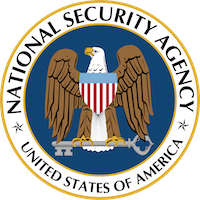


---
## Chiffrement asymétrique
Inventé par Whitfield Diffie et Martin Hellman en 1976, le chiffrement asymétrique vient résoudre l'inconvénient essentiel du chiffrement symétrique : le nécessaire partage d'un secret (la clé) avant l'établissement de la communication sécurisée.  

### Principe
Le principe de base est l'existence de deux clés différentes pour l'encryptage et le décryptage des messages : une **clé publique**, appelée à être distribuée largement, et **une clé privée**, qui ne quitte jamais son propriétaire.  
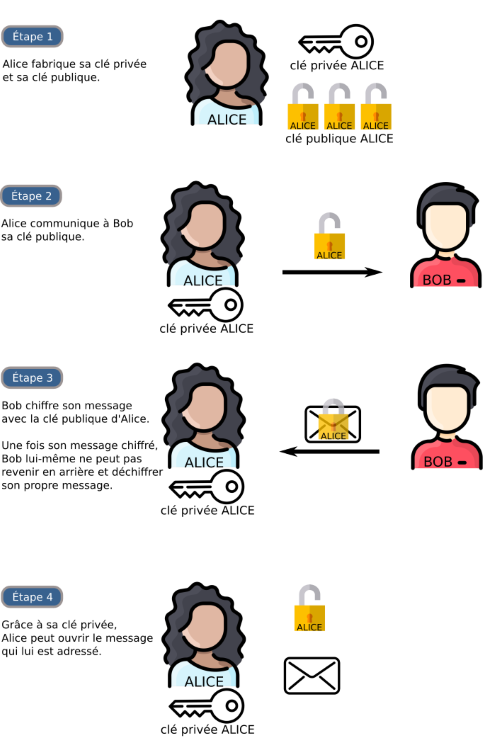  
L'illustration précédente associe une image de cadenas à la clé publique (car on s'en sert pour chiffrer les messages) et une image de clé à la clé privée (car on s'en sert pour déchiffrer les messages) pour faciliter la compréhension. En réalité il est possible de chiffrer avec la clé privée et déchiffrer avec la clé publique, on dit que les clés sont **interchangeables**.
> 📌 L'important ici est qu'il n'est possible de déchiffrer un message qu'en connaissant les clés privées **et** publiques.


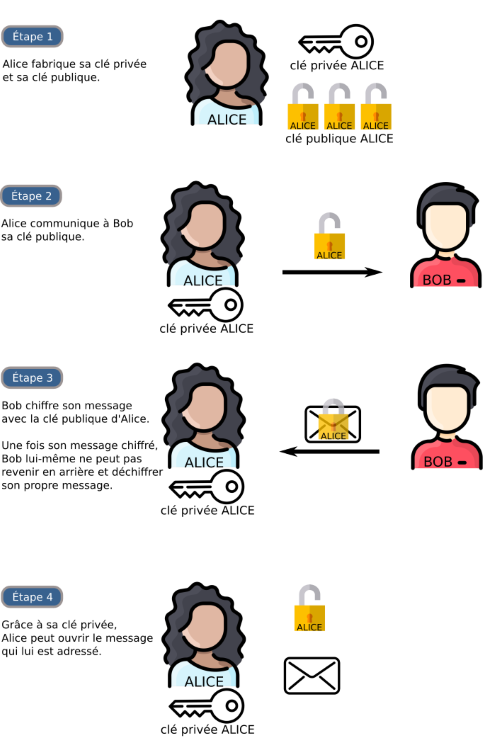

### Bilan chiffrement asymétrique
> 📌 Un chiffrement est dit **asymétrique** lorsque la clé ayant servi au chiffrement est différente de celle permettant de déchiffrer le message.  

**Avantages :**
- Les données ne peuvent être déchiffrées qu’à l’aide de la clé privée détenue par le propriétaire
- En cas de perte ou de vol de la clé publique, les données ne sont pas compromises.
- Permet l’authentification et la non-répudiation en plus de la confidentialité

**Inconvénients :**
- Il est plus lent que le chiffrement symétrique.
- Il utilise plus de ressources
- En cas de perte de la clé privée, il n’existe aucun moyen de la récupérer

### Le chiffrement RSA
Le chiffrement [**RSA**](https://fr.wikipedia.org/wiki/Chiffrement_RSA) (nommé par les initiales de ses trois inventeurs) est un algorithme de cryptographie asymétrique, très utilisé dans le commerce électronique, et plus généralement pour échanger des données confidentielles sur Internet. Cet algorithme a été décrit en 1977 par Ronald **R**ivest, Adi **S**hamir et Leonard **A**dleman.  
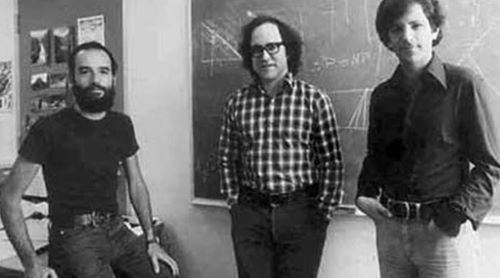

---
## HTTPS : Utilisation conjointe d'un chiffrement asymétrique et d'un chiffrement symétrique

Aujourd'hui, plus de 90 % du trafic sur internet est chiffré : les données ne transitent plus en clair (protocole http) mais de manière chiffrée (protocole https), ce qui empêche la lecture de paquets éventuellements interceptés.  
> 📌 Le protocole **https** est la réunion de deux protocoles :
>- Le protocole **TLS** (**T**ransport **L**ayer **S**ecurity, qui a succédé au SSL) : basé sur du chiffrement **asymétrique** (RSA) pour permettre à la transmission de manière sécurisée d'une clé entre le client et le serveur.
>- Le protocole **http** qui chiffrera des données avec la clé générée à l'étape précédente. Les données peuvent toujours être interceptées, mais sont illisibles. Le chiffrement **symétrique** utilisé est actuellement le chiffrement [**AES**](https://fr.wikipedia.org/wiki/Advanced_Encryption_Standard).

La mise en place du protocole est appelée **"Handshake"** (_poignée de main en Anglais_) et se divise en 4 étapes :
- **Étape 1** : le «client Hello». Le client envoie une requête au serveur avec sa version de TLS utilisée.
- **Étape 2** : le «server Hello». Le serveur répond en renvoyant son certificat prouvant son identité, ainsi que sa clé publique (RSA).
- **Étape 3** : le client interroge l'autorité de certification pour valider le fait que le certificat est bien valide et que le serveur est bien celui qu'il prétend être.
- **Étape 4** : le client génère une clé de chiffrement symétrique . Cette clé est chiffrée avec la clé publique du server (transmise à l'étape 1) et envoyée au serveur. Le serveur déchiffre cette clé grâce à sa clé privée, et dispose ainsi lui aussi de la clé.  

La transmission par protocole http de données chiffrées au préalable avec la clé AES peut commencer.

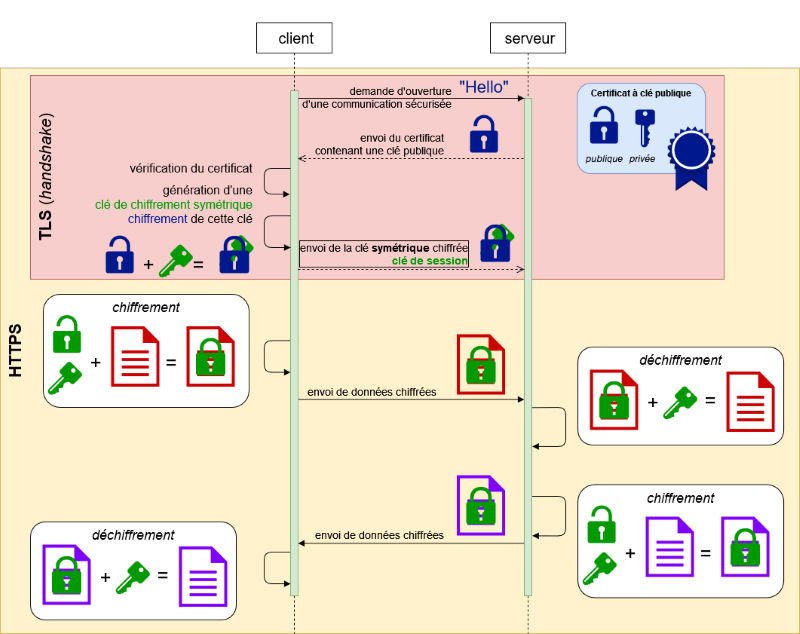



>💡La présentation du certificat à l'autorité de certification peut se représenter comme la vérification de l'identité du site. L'autorité de certification (dont la base de données est interrogée par un logiciel) valide que le certificat est bien un document officiel.  
>Les certificats numériques sont délivrés aux administrateurs de sites par des [**autorités de certification**](https://fr.wikipedia.org/wiki/Autorit%C3%A9_de_certification) (Certificate Authority – CA) : des organismes habilités (entreprises spécialisées, associations à but non lucratifs, états). Pour Internet il sont au format `X.509` un format de fichier binaire.
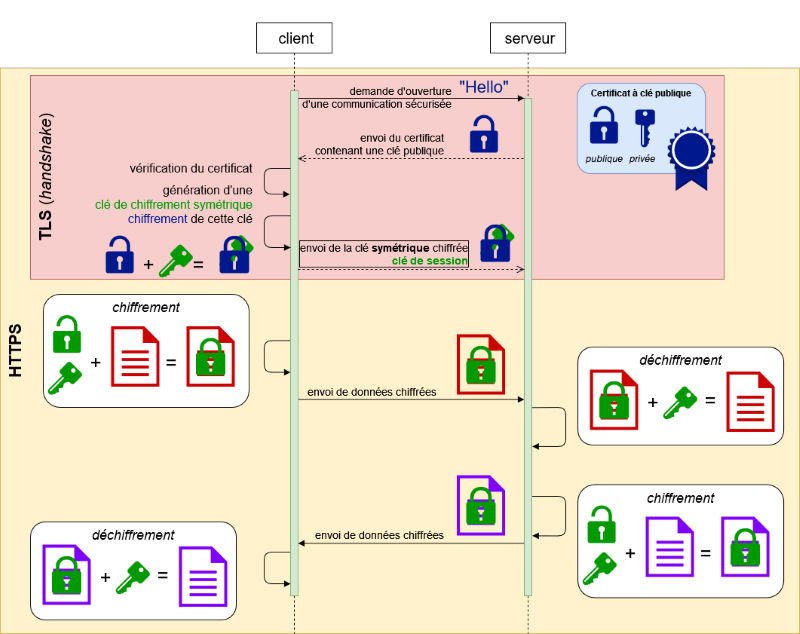

---
## Voir aussi

- Cette [vidéo](https://www.youtube.com/watch?v=8BM9LPDjOw0) de la chaîne **ScienceEtonnante** résume de manière concise mais très claire les notions abordées dans cette leçon.
- Le site [**dCode.fr**](https://www.dcode.fr/fr) propose des outils pour le chiffrement/déchiffrement (code César, codes ASCII,…) 
- Le [Portal de la Cryptologie](https://fr.wikipedia.org/wiki/Portail:Cryptologie) de **Wikipedia**.